<a href="https://colab.research.google.com/github/ProjectStuff0w0/Covid_detection_CNN/blob/master/XCeptionVersion__Simple_Classification_in_Covid_Image_19_April_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This command installs the Cartopy library, a Python package for geospatial data processing and visualization, 
# using the pip package manager.
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 81.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.4 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113646 sha256=e0b127ac0c6ed00c49625cd51d982a87de4378c2b48d233a922751cb1f535320
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy


In [ ]:
%pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.9/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#!unzip -q covidImages.zip
#!ls
# Preprocess Covid Dataset Repository : https://drive.google.com/drive/folders/1GcqHp_Q05i8uwPeX2JIucskmRXUCXsGw?usp=share_link
# Original Dataset Source: https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=70230281
#
%cd '/content/drive/MyDrive/RISET COVID-19/'

/content/drive/.shortcut-targets-by-id/1GcqHp_Q05i8uwPeX2JIucskmRXUCXsGw/RISET COVID-19


In [5]:
# This Python script scans two directories containing images, 
# checks if the images are in the JFIF format (a common format for JPEG images), and deletes any non-JFIF images, keeping a count of the number of images deleted.

# Here's a breakdown of the code:
# Import the os module, which provides a way to interact with the operating system, e.g., navigating directories and manipulating files.
# Initialize the num_skipped variable to 0, which will be used to count the number of images deleted.
# Iterate through the folder names "negative" and "severe" using a for loop.
# Construct the folder path by joining "data" and the folder name (either "negative" or "severe").
# Iterate through the files in the folder using another for loop, accessing the list of filenames in the folder with os.listdir(folder_path).
# Construct the full file path by joining the folder path and the file name.
# Use a try-finally block to open the file in binary mode ("rb") and check if the file contains the JFIF marker (a sequence of bytes indicating a JPEG image). The finally block ensures the file is closed even if an exception occurs.
# If the file does not contain the JFIF marker, increment the num_skipped counter and delete the file using os.remove(fpath).
# After iterating through all the files in both folders, print the total number of deleted images using the num_skipped counter.
# In summary, this script scans two image directories, "data/negative" and "data/severe", and removes any files that aren't valid JFIF images, reporting the number of deleted images at the end.
# ---------------------------------------------------------------------
import os

num_skipped = 0
for folder_name in ("negative", "severe"):
    folder_path = os.path.join("data", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)


Deleted 0 images


In [6]:
# This code snippet uses TensorFlow and the Keras API to create two image datasets for training and validation purposes from a directory named "data".
# Define the image_size tuple as (180, 180), which will be the size of the images after they are resized.
# Define the batch_size variable as 32, which determines the number of images to be processed in each batch during training and validation.
# Create a train_ds dataset using tf.keras.preprocessing.image_dataset_from_directory() function with the following parameters:

# "data": The directory containing the images.
# validation_split=0.2: Reserve 20% of the images for validation purposes.
# subset="training": Specify that this dataset is for training.
# seed=1337: Set a random seed for reproducibility when shuffling the data.
# image_size=image_size: Resize the images to 180x180 pixels.
# batch_size=batch_size: Process the images in batches of 32.
# Create a val_ds dataset using the same image_dataset_from_directory() function, but this time, set the subset parameter to "validation", indicating that this dataset is for validation purposes.

# In summary, this code snippet creates two datasets for training and validation from a "data" directory, with images resized to 180x180 pixels and processed in batches of 32.

# input image dimensions
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 221 files belonging to 2 classes.
Using 177 files for training.
Found 221 files belonging to 2 classes.
Using 44 files for validation.


In [7]:
# This code snippet applies the prefetch method to both the train_ds and val_ds TensorFlow datasets.
# Prefetching is an optimization technique that helps reduce the time spent waiting for data loading during training.

# train_ds.prefetch(buffer_size=32) and val_ds.prefetch(buffer_size=32) 
# apply prefetching to the training and validation datasets, respectively,
# with a buffer size of 32. This means that the datasets will load up to 32 batches of data in advance,
# so that when the model requests a new batch of data, it is already loaded and available, reducing the waiting time.

# In summary, these lines of code optimize the training and validation datasets by prefetching 32 batches of data
# to minimize data loading latency during model training.

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

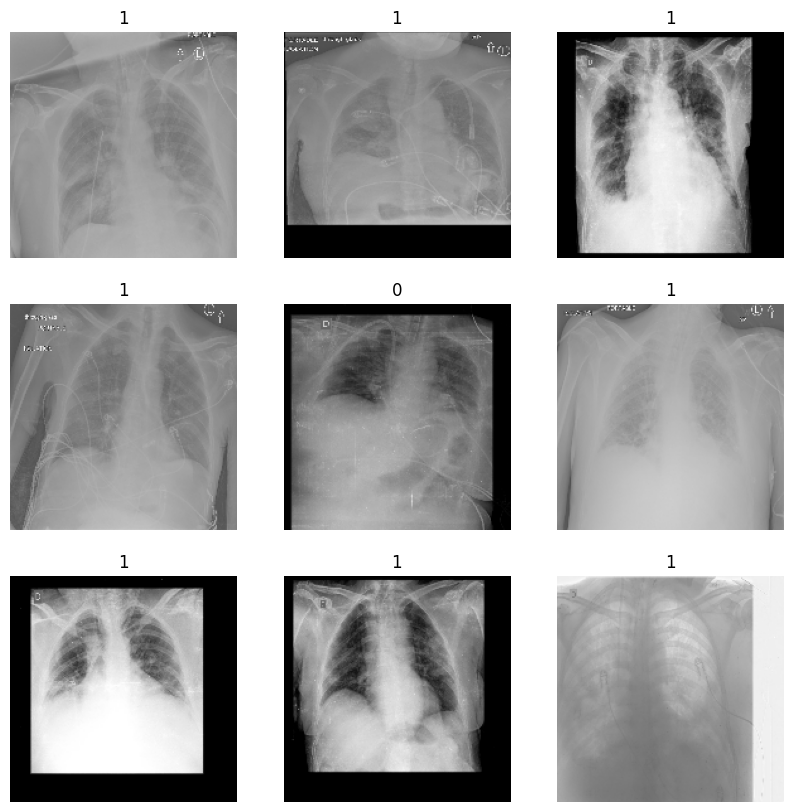

In [8]:
# This code snippet imports the matplotlib.pyplot module and uses it to display a 3x3 grid of images from the train_ds dataset.
# Here's a breakdown of the code:

# Import the matplotlib.pyplot module as plt to create and display plots.
# Create a new figure with a custom size (10 x 10) using plt.figure(figsize=(10, 10)).

# Use a for loop to iterate over the batches in train_ds with train_ds.take(1). 
# The .take(1) method retrieves only one batch from the dataset.

# Inside the outer loop, use another for loop to iterate over the first 9 images and their labels in the batch. 
# The range is set to 9 (range(9)), which means the loop will iterate from 0 to 8.

# For each image, create a subplot in a 3x3 grid using plt.subplot(3, 3, i + 1).
# The i + 1 value specifies the position of the subplot in the grid.

# Display the image in the subplot using plt.imshow(images[i].numpy().astype("uint8")).
# The image is first converted to a NumPy array and then cast to an 
# unsigned 8-bit integer type to ensure correct display.

# Set the title of the subplot to the corresponding 
# label using plt.title(int(labels[i])).

# Remove the axis ticks and labels by calling plt.axis("off").

# In summary, this code snippet displays a 3x3 grid of images from 
# the first batch in the train_ds dataset using matplotlib.pyplot. Each image is displayed with its corresponding label as the title.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


In [ ]:
# This code snippet defines a Keras Sequential model called data_augmentation that contains two image augmentation layers:
# RandomFlip and RandomRotation.
# data_augmentation is a keras.Sequential model,
# which is a linear stack of layers.
# 
# Inside the Sequential model, there are two augmentation layers:
# a. layers.experimental.preprocessing.RandomFlip("horizontal"):
#    This layer randomly flips the input images horizontally (left-to-right).
    # The probability of flipping an image is 50%.
# b. layers.experimental.preprocessing.RandomRotation(0.1): This layer randomly rotates the input images within a range of ±10% (±0.1 * 180 degrees). The rotation is performed around the center of the image.
# 
# By applying these augmentations during training, the model is exposed to a wider variety of input data. This can help improve its ability to generalize and reduce overfitting.
# Here's the code snippet in Colab text format:

data_augmentation = keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)


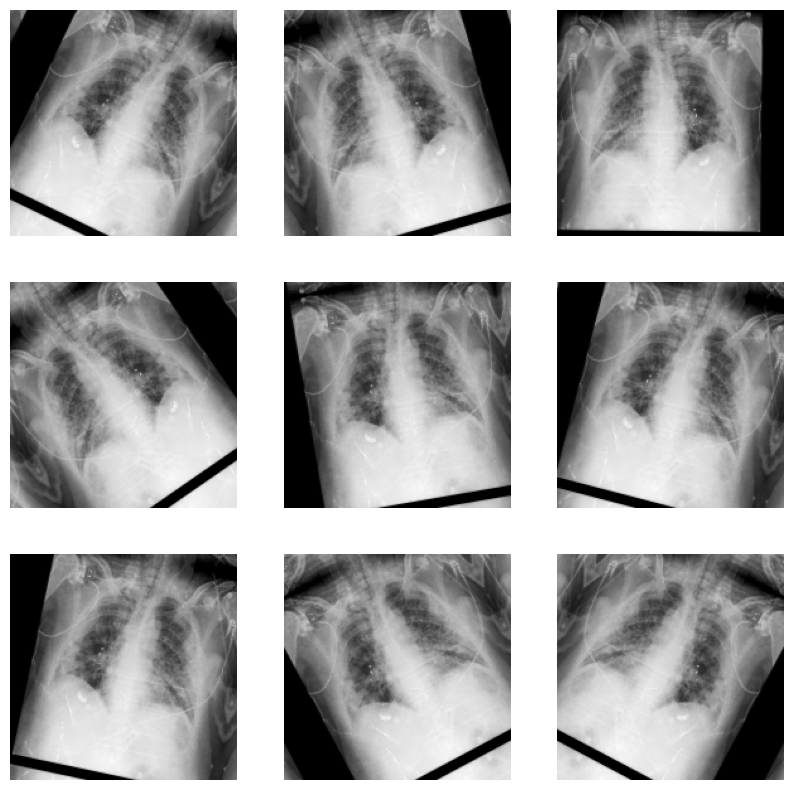

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [ ]:
from keras.utils.vis_utils import plot_model

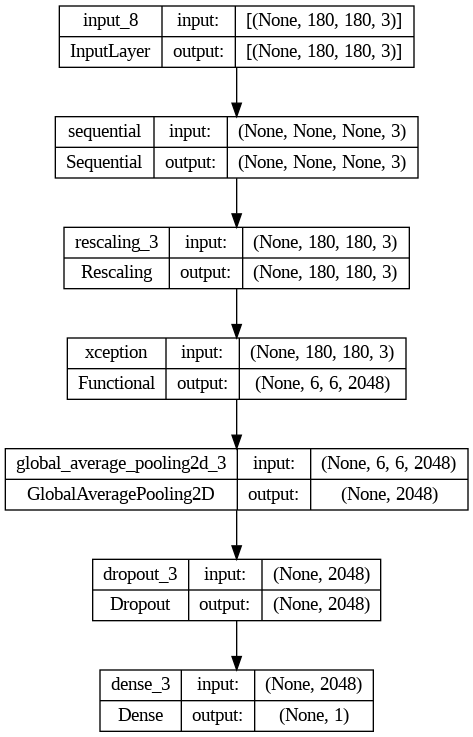

In [ ]:
# This code defines a custom convolutional neural network (CNN) model
# for image classification using the Keras library. 
# The model has several layers, including convolutional,
# separable convolutional, max pooling, and dense layers. 
# It also incorporates image augmentation, residual connections, 
# and dropout for improved performance and generalization.

# A function called make_model is defined,
# which takes two parameters: input_shape 
# (the size of the input images) and num_classes 
# (the number of classes to classify).

# The model is built using a Keras functional API 
# with an input layer and an image augmentation layer.

# The model then goes through a series of convolutional 
# and max pooling layers that help extract features from the input images.

# Separable convolutional layers are used to reduce 
# the number of trainable parameters and improve the model's performance.

# Residual connections are added to the model to help 
# with the gradient flow during training, which can help prevent vanishing gradient issues in deep networks.

# A global average pooling layer is used to reduce the 
# feature maps' spatial dimensions, followed by a dropout layer to prevent overfitting.

# Finally, a dense layer with either sigmoid 
# (for binary classification) or softmax (for multi-class classification) activation is added to output the class probabilities.

# The model is then created using the make_model function 
# with the input shape derived from the image_size variable and the number of classes set to 2.

# The model's architecture is visualized using 
# the keras.utils.plot_model function, showing the shapes of the layers.

# In summary, this code defines and visualizes 
# a custom CNN model for image classification using Keras, with various techniques to improve performance and prevent overfitting.

'''
def make_model(input_shape, num_classes):
    #Start Neural Network
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    #convolution 1st layer
    x = tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = tf.keras.layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    #convolution 2nd layer
    x = tf.keras.layers.Conv2D(64, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    #convolution 3nd layer *tambahan1
    x = tf.keras.layers.Conv2D(64, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    #Tambahan 2 maxpooling
    x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        #pindah tempat maxpooling
        x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

        #additional 1
        #x = layers.Activation("relu")(x)
        #x = layers.SeparableConv2D(size, 3, padding="same")(x)
        #x = layers.BatchNormalization()(x)

        # Project residual
        residual = tf.keras.layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = tf.keras.layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = tf.keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes
    #Fully connected final layer
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(units, activation=activation)(x)
    return tf.keras.Model(inputs, outputs)
'''
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=image_size + (3,),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=image_size + (3,))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1.0 / 255, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.5)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)



#model = make_model(input_shape=image_size + (3,), num_classes=2)
dot_img_file = '/tmp/model_1.png'
keras.utils.plot_model(model, to_file=dot_img_file,show_shapes=True)

In [ ]:
# This code snippet sets the training parameters for the 
# custom CNN model created earlier, compiles the model,
# and then trains it using the train_ds and val_ds datasets.

# The number of training epochs is set to 400,
# meaning the model will iterate over the entire training dataset 400 times.

# A callbacks list is created, containing a single ModelCheckpoint callback.
# This callback saves the model at each epoch as a file named "save_at_{epoch}.h5", where {epoch} is the current epoch number. This allows you to load a specific epoch's model later if needed.

# The model is compiled using the compile method,
#  with the following parameters:

# optimizer: The Adam optimizer is used with a learning rate of 1e-3 (0.001). The optimizer adjusts the model's weights during training to minimize the loss function.
# loss: The loss function is set to "binary_crossentropy", which is suitable for binary classification tasks. It measures the difference between the true labels and the predicted probabilities.
# metrics: A list of evaluation metrics to be used during training. In this case, only "accuracy" is used, which calculates the percentage of correctly classified samples.
# The model is trained using the fit method, with the following parameters:

# train_ds: The training dataset.
# epochs: The number of epochs to train the model, set to 400.
# callbacks: The list of callbacks to be used during training, which includes the ModelCheckpoint callback.
# validation_data: The validation dataset, set to val_ds. The model's performance on this dataset will be evaluated at the end of each epoch.
# In summary, this code snippet sets the training parameters, compiles the custom CNN model, and trains it using the training and validation datasets for 400 epochs, saving the model at each epoch.
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
epochs = 5
callbacks = [
    keras.callbacks.ModelCheckpoint("/save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds
)

Epoch 1/5
6/6 [==============================] - 50s 8s/step - loss: 5.3431 - accuracy: 0.3616 - val_loss: 1.4947 - val_accuracy: 0.6818
Epoch 2/5
6/6 [==============================] - 37s 6s/step - loss: 3.2994 - accuracy: 0.6893 - val_loss: 2.1161 - val_accuracy: 0.8636
Epoch 3/5
6/6 [==============================] - 38s 6s/step - loss: 3.7462 - accuracy: 0.7401 - val_loss: 2.0862 - val_accuracy: 0.8636
Epoch 4/5
6/6 [==============================] - 39s 7s/step - loss: 3.9766 - accuracy: 0.7345 - val_loss: 2.0794 - val_accuracy: 0.8636
Epoch 5/5
6/6 [==============================] - 37s 6s/step - loss: 3.8897 - accuracy: 0.7401 - val_loss: 2.0794 - val_accuracy: 0.8636


In [ ]:
scores = model.evaluate(val_ds,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.36%


Text(0.5, 1.0, 'Validation loss')

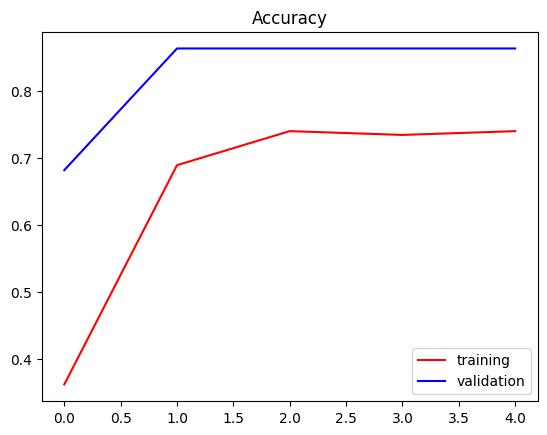

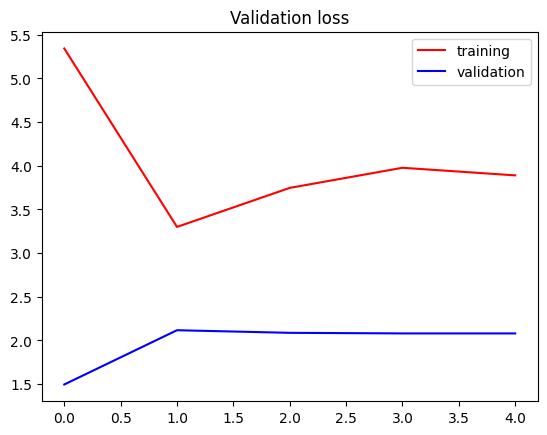

In [ ]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs,acc,'r',label='training')
plt.plot(epochs,val_acc,'b',label='validation')
plt.legend()
plt.title('Accuracy')

plt.figure()

# Plot training and validation loss per epoch
#plt.plot(epochs, loss)
#plt.plot(epochs, val_loss)

plt.plot(epochs,loss,'r',label='training')
plt.plot(epochs,val_loss,'b',label='validation')
plt.legend()
plt.title('Validation loss')

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Jun  6 19:42:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------